## An end to end scikit learn workflow

# Let's listify the contents

What we are covering

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

In [2]:
# 1. Getting the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
heart_disease = pd.read_csv(r"C:\Users\Harshal Garg\Desktop\Z2M DS and ML\10.1 heart-disease.csv.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
#create X, feature matrix
x = heart_disease.drop('target', axis = 1)

#create y, labels
y = heart_disease["target"]

In [23]:
# 2. Choose the right model and hyperparameters
#hyperparamters are dials that can be tuned to make our model better
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() #we are using model in our ML

#We'll keep the default hyperparameters, we can tune it though
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [25]:
clf.fit(x_train, y_train) #(it is like input and output)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#make a prediction model
#conventinal name
y_preds = clf.predict(x_test) #(testing our model)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [28]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train) #it should be 1

1.0

In [29]:
clf.score(x_test, y_test) #it shouldn't be onescore

0.8524590163934426

In [30]:
#comparing the predicted values with the real values
clf_1 = pd.DataFrame([y_preds, y_test])
clf_1.T[clf_1.T[0] != clf_1.T[1]] #the values that didn't matched

,0,1
1,1,0
11,0,1
20,0,1
22,1,0
25,1,0
26,1,0
30,0,1
33,0,1
46,1,0


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#displays all kinds of different evaluating parameters
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [32]:
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [33]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [34]:
# 5. Improve a model
#Try different amount fo n_estimators
np.random.seed(42)
for i in range(10, 110, 10):
    print(f"Trying model with {i} estimators..")
    #test the model
    clf2 = RandomForestClassifier(n_estimators = i).fit(x_train, y_train) 
    #find the accuracy
    print(f"Model accuracy on test set : {clf2.score(x_test, y_test) * 100:.2f}")
    print("")

Trying model with 10 estimators..
Model accuracy on test set : 85.25

Trying model with 20 estimators..
Model accuracy on test set : 80.33

Trying model with 30 estimators..
Model accuracy on test set : 83.61

Trying model with 40 estimators..
Model accuracy on test set : 80.33

Trying model with 50 estimators..
Model accuracy on test set : 86.89

Trying model with 60 estimators..
Model accuracy on test set : 83.61

Trying model with 70 estimators..
Model accuracy on test set : 83.61

Trying model with 80 estimators..
Model accuracy on test set : 83.61

Trying model with 90 estimators..
Model accuracy on test set : 81.97

Trying model with 100 estimators..
Model accuracy on test set : 85.25



In [35]:
# 6. Save a model and load it
import pickle

pickle.dump(clf2, open("random_forest_model_1.pkl", "wb")) #write binary

In [36]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', "rb"))
#populating the model with test data
loaded_model.score(x_test, y_test)

0.8524590163934426

In [37]:
import sklearn
sklearn.show_versions()


System:
    python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Harshal Garg\anaconda3\python.exe
   machine: Windows-10-10.0.17763-SP0

Python dependencies:
       pip: 20.0.2
setuptools: 45.2.0.post20200210
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: 0.29.15
    pandas: 1.0.1
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


## Getting our data ready to be used with machine learning

Three main things we have to do:
1. Split the data into feature and labels (usually `x` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [38]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
x = heart_disease.drop('target', axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [40]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [41]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2)

In [42]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Convert data to numerical

In [43]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [44]:
len(car_sales), car_sales.dtypes

(1000,
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [45]:
# Split into X/y
x = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

In [46]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [47]:
#conversion of strings into float
#this is not directly converted, but rather encoded in a different model
# it turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#we will one hot encode the features with the same code as before
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

# Now transform
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [48]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
# another way of converting into numbers, using pandas. 
# This method is ineficient and hence, not used  
# dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
# dummies

In [50]:
#Split into training and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

In [51]:
# Build Machine learning model
#this model return a number, other than that it is similar to classfier

from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
model.score(x_test, y_test) * 100

32.35867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also known as imputation)
2. Remove the samples with missing data

In [53]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [54]:
#Tells the number of missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Solve missing value problem 

#### Option 1: Fill the missing data with Pandas

In [55]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [56]:
#Fill the missing values using pandas

car_sales_missing['Make'].fillna("missing", 
                                 inplace = True)

car_sales_missing['Colour'].fillna("missing", 
                                   inplace = True)

car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), 
                                          inplace = True) #Taking the avg

car_sales_missing['Doors'].fillna(4, # filling with max number of doors
                                  inplace = True) 

In [57]:
#Remove the missing price values rows
car_sales_missing.dropna(inplace = True)

In [58]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [59]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
a = car_sales_missing.drop('Price', axis = 1)
b = car_sales_missing['Price']
a

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [62]:
categorical_features = ["Make", "Colour", 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough")

# Instead of taking a to transform we are taking car_sales_missing
# transformed_a = transformer.fit_transform(a)
transformed_a = transformer.fit_transform(car_sales_missing)
transformed_a

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [63]:
pd.DataFrame(transformed_a)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2: Fill the missing values with scikit learn

In [64]:
car_sales_missing2 = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [65]:
car_sales_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
#remove rows with price as nan
car_sales_missing2.dropna(subset = ['Price'], inplace = True)
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [67]:
#split the data
x = car_sales_missing2.drop("Price", axis = 1)
y = car_sales_missing2["Price"]

**Impute using pandas or sklearn, which is better/faster ?**

In [68]:
#Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill missing values
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# define columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_features),
    ('num_imputer', num_imputer, num_features)
])

#transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [69]:
car_sales_filled = pd.DataFrame(filled_x, 
                               columns = ['Make', 
                                          'Colour', 
                                          'Doors', 
                                          'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [70]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough")

# Instead of taking a to transform we are taking car_sales_missing
# transformed_a = transformer.fit_transform(a)
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [72]:
#Now w've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(transformed_x, 
                                                   y,
                                                   test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

## 2. Choosing the right estimator/algorithm for our problem 

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [73]:
# Import Boston housing dataset
from sklearn.datasets import load_boston 
boston = load_boston()
boston;

**doubt about a data set**

In [74]:
type(boston), 
#seems like it a dataset in form of dictionary imported from sklearn library
boston.keys()
#it has 13 columns  but only 5 keys, why??

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [75]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [76]:
boston_df = pd.DataFrame(boston["data"], columns = boston['feature_names'])
boston_df["target"] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
boston_df.shape

(506, 14)

#### Ridge Regression Model

In [78]:
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2)

#train the model
model =Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6662221670168522

How do we improve our score?

What if the Ridge is not working

We refer to the map - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [79]:
#Ensemble - Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test) 


0.873969014117403

In [80]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()
#we will not encode this data as all the values required are already in numbers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2.2 Choosing estimator for a classification Problem

according to map we choose try `LinearSVC`

In [81]:
#choosing the correct model and import
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create the input and output
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#split into test and train
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size = 0.2)

#train the model and instatntiate Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_trian)

#Evalute
model.score(X_test, y_test)

0.8524590163934426

In [82]:
#choosing the correct model and import
from sklearn.svm import LinearSVC #Support vector classification
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

np.random.seed(42)
#create the input and output
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#split into test and train
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size = 0.2)

#train
model = LinearSVC(max_iter = 25000, dual = False)
model.fit(X_train, y_trian)

#score
model.score(X_test, y_test)

0.8688524590163934

In [83]:
#choosing the correct model and import
from sklearn import svm
from sklearn.model_selection import train_test_split

#create the input and output
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#split into test and train
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size = 0.2)

#train
model = svm.SVC()
model.fit(X_train, y_trian)

#score
model.score(X_test, y_test)

0.5901639344262295

#### Tidbit:
    
1. If you have structured data, used ensemble methods (In our case RandomForest(s))
2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [84]:
#choosing the correct model and import
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create the input and output
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#split into test and train
X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size = 0.2)

#train the model and instatntiate Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_trian)

#Evalute
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [86]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [87]:
# Use trained  model to make prediction
#this didn't work, because the imput was not in the desired format
#clf.predict(np.array([1, 3, 6, 9 , 5]))

In [88]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


Make predictions with `predict()`

In [89]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [90]:
# Compare predictions with real values
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [91]:
clf.score(X_test, y_test)

0.8524590163934426

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [93]:
# predict_proba returns probability of a classification label
# returns the probability of 0, 1 for each input case
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [94]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression model

In [95]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop('target',  axis = 1)
y = boston_df['target']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

#make prediction
y_preds = model.predict(X_test)

In [97]:
y_preds

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738, 19.516, 19.83 ,  8.885, 21.918, 19.477, 26.465,
       19.347,  8.039, 45.414, 14.542, 24.564, 23.941, 14.481, 23.077,
       15.031, 14.625, 21.171, 14.164, 19.251, 20.717, 19.433, 23.242,
       31.091, 20.39 , 14.294, 15.796, 34.3  , 19.155, 20.639, 24.464,
       18.779, 29.688, 45.257, 19.449, 22.334, 13.727, 15.408, 24.621,
       18.783, 28.247, 21.411, 33.961, 17.011, 26.312, 44.904, 21.988,
       15.65 , 32.316, 22.281, 20.394, 25.405, 34.266, 28.938, 18.857,
       26.909, 17.154, 13.731, 23.079, 28.508, 15.818, 20.41 , 28.38 ,
       10.153, 21.336, 22.393,  7.093, 20.059, 45.424, 10.964, 12.914,
       21.387, 12.29 , 20.234,  9.065, 20.218, 26.736, 15.531, 23.228,
       23.568, 17.719, 21.64 ,  7.991, 19.6  , 18.7  , 22.292, 19.665,
       38.756, 13.03 , 12.49 , 13.406, 20.219, 23.898])

In [98]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating a ML model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

### 4.1 Evaluating a model with the `score` method

In [99]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
clf.score(X_train, y_train)

1.0

In [101]:
clf.score(X_test, y_test)

0.8524590163934426

Same `score` method for Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
X = boston_df.drop('target',  axis = 1)
y = boston_df['target']

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
model.score(X_test, y_test)

0.873969014117403

In [104]:
model.score(X_train, y_train)

0.976679849361528

### 4.2 Evaluating a model using the `scoring` parameter

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [106]:
clf.score(X_test, y_test, )

0.8524590163934426

In [107]:
#image of cross validation to inserted here

In [108]:
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [109]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [110]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [111]:
from sklearn.model_selection import cross_val_score #take mulitple test-train samples
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [112]:
np.mean(cross_val_score)

0.8248087431693989

In [113]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score) * 100 :.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the reciver operating characterstics curve (AUC/ROC)**

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

* Area under curve
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) vs false positive rate (fpr)

* True positive  = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True nagative  = model predicts 0 when truth is 0
* False nagative = model predicts 0 when truth is 1

In [114]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
from sklearn.metrics import roc_curve

#Fit the classifier
clf.fit(X_train, y_train)

#Make predictions with probability
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [116]:
y_probs_positive = y_probs[:, 1]#this will take the second index in each array
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [117]:
# Calculate fpr, tpr and thresholds
#don't know anything about ROC curve or threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive) 

#check the values
fpr.shape, tpr.shape, thresholds.shape

((26,), (26,), (26,))

In [118]:
pd.DataFrame(data = [fpr, tpr, thresholds]).T.head()

,0,1,2
0,0.000000,0.0000,2.00
1,0.034483,0.0000,1.00
2,0.034483,0.1250,0.98
3,0.034483,0.1875,0.95
4,0.034483,0.2500,0.92


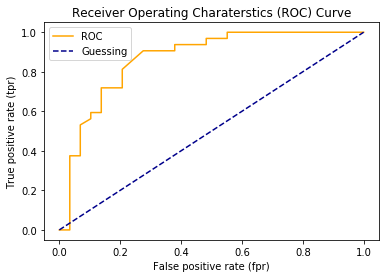

In [119]:
#Plot ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    #Plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    #plt.scatter(fpr, tpr, color = 'orange', label = 'ROC')
    
    #Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], 
             color = 'darkblue', 
             ls = '--', 
             label = 'Guessing')
    
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Charaterstics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [120]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

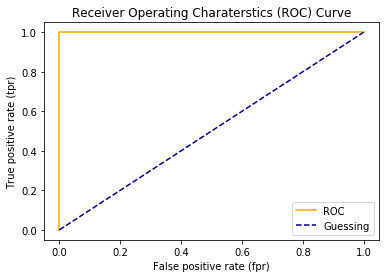

In [121]:
# Plot the perfect ROC curve and AUC score
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [122]:
fpr, tpr, threshold

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [123]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick to compare the labels a model predicts and actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [124]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [127]:
#Visulize confusion matrix with crosstab
pd.crosstab(y_test,
           y_preds,
            rownames = ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


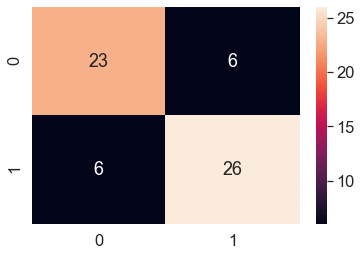

In [126]:
#Make our confusion Matrix more visual with Seaborn's heatmap()
import seaborn as sns

#Set the font size 
sns.set(font_scale = 1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

#plot it using Seaborn
# sns.heatmap(conf_mat, annot = True, 
#             xticklabels = 'True Label', 
#             yticklabels = 'Predict label')

sns.heatmap(conf_mat, annot = True)

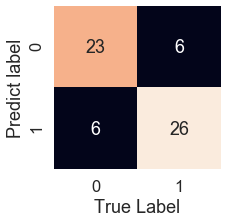

In [109]:
np.random.seed(42)

def plot_conf_mat(conf_mat):
    # Plots heatmap of confusion matrix
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(conf_mat,
                    annot = True, #this will populate the boxes with conf_mat info,
                    cbar = False) #this will remove the heat bar
    
    ax.set(xlabel = 'True Label', ylabel = 'Predict label')
                     
plot_conf_mat(conf_mat);        

In [110]:

# present but still can't be used
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(clf, X, y);

#### Classification report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's see one.

In [111]:
np.random.seed(42)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [112]:
 # where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only 1 positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

#Evaluate the model
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

C:\Users\Harshal Garg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  
For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**MAE vs MSE** - https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

# Read R^2

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [114]:
model.score(X_test, y_test)

0.873969014117403

In [115]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [116]:
y_test.mean()

21.488235294117654

In [117]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [118]:
r2_score(y_test, y_test_mean) 
#it should have been zero, but there is a slight difference in the value due to rounding of the varibale

2.220446049250313e-16

In [119]:
r2_score(y_test, y_test)

1.0

**Mean Absoulte error (MAE)**

MAE is the average of the absolute differnce predictions and actual values. It gives you a idea of how wrong your predictions are.


In [120]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [121]:
df = pd.DataFrame({"actual values" : y_test, "predicted values" : y_preds})
df['difference'] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean Squared Error (MSE)**

In [122]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [123]:
df['Squared difference'] = (df["predicted values"] - df["actual values"])**2

In [124]:
df


,actual values,predicted values,difference,Squared difference
173,23.6,23.002,-0.598,0.357604
274,32.4,30.826,-1.574,2.477476
491,13.6,16.734,3.134,9.821956
72,22.8,23.467,0.667,0.444889
452,16.1,16.853,0.753,0.567009
...,...,...,...,...
412,17.9,13.030,-4.870,23.716900
436,9.6,12.490,2.890,8.352100
411,17.2,13.406,-3.794,14.394436
86,22.5,20.219,-2.281,5.202961


In [125]:
np.mean(df['Squared difference'])

9.24232899019608

 ### 4.2.3 Finally using the `scoring` parameter

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [127]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv = 5)
cv_acc, np.mean(cv_acc)

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

In [128]:
# Cross-validation accuracy
print(f'The cross-validation accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross-validation accuracy is 82.48%


In [129]:
np.random.seed(42)
#default scoring paramter = accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc, np.mean(cv_acc)

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

In [130]:
#precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
cv_precision, np.mean(cv_precision)

(array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974]),
 0.8085601538512754)

In [131]:
#Recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
cv_recall, np.mean(cv_recall)

(array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091]),
 0.8424242424242424)

In [132]:
#f1
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
cv_f1, np.mean(cv_f1)

(array([0.8358209 , 0.89230769, 0.84848485, 0.83076923, 0.8       ]),
 0.841476533416832)

**How about Regression model?**

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

model = RandomForestRegressor()

In [134]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = None)
cv_r2, cv_r2.mean()

(array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166]),
 0.622375083951403)

In [135]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = 'r2')
cv_r2, cv_r2.mean()

(array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166]),
 0.622375083951403)

In [136]:
#Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')
cv_mae, cv_mae.mean()

(array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069]),
 -2.9961217433508045)

In [137]:
#Mean squared error
cv_mse = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error')
cv_mse, cv_mse.mean()

(array([ -7.77433365, -12.76515461, -19.26965413, -46.20221782,
        -19.10133112]),
 -21.02253826604542)

### 4.3 Using diffrent evalution metrics as Scikit-Learn functions

**Classification evaluation functions**

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some prediction
y_preds = clf.predict(X_test)

#Evaluate the classifier
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test, y_preds)*100 :.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


**Regression Evalution Functions**

In [139]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

#make the predictions
y_preds = model.predict(X_test)

#evaluate the regression model using different metrics
print(f"R2 : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")


R2 : 0.8739690141174031
MAE : 2.1226372549019623
MSE : 9.242328990196082


## 5. Imporving a Model
    
First Prediction = baseline predictions  
First Model = baseline model

From data prespective:
* Could we collect more data? (generally, more the data, better the model)
* Could we improve the data? (Quality of data)

From Model Perspective:
* Is there a better model we could use? - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
* Could we improve the current model?

**Parameters** = Model find these patterns in data  
**Hyperparameters** = settings on a model you can adjust to (potentially) improve it's abolity to find the patterns

Three ways to adjust hyperparameters:
* By hand
* Randomly with `RandomSearchCV`
* Exhaustively with `GridSearchCV`

 ### 5.1 Tunning hyperparameters by hand

Let's make 3 sets (instead of 2) - Training, validation, test

In [140]:
clf.get_params() #baseline parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and  adjust:

*`max_depth`  
*`max_features`  
*`min_sample_leaf`  
*`min_sample_split`  
*`n_estimators`

In [141]:
def evaluate_preds(y_true, y_preds):
    # Preforms evaluation comparison on y_true labels vs y_preds 
    # labels on a classification.

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy' : round(accuracy, 2),
                   'precision' : round(precision, 2),
                   'recall' : round(recall, 2),
                   'f1' : round(f1, 2)}
    
    print(f'Accuracy {accuracy * 100 : .2f}%')
    print(f'Precision {precision * 100 : .2f}%')
    print(f'Recall {recall * 100 : .2f}%')
    print(f'F1 {f1 * 100 : .2f}%')
    
    return metric_dict   

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1) 

#split the data into X, y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split the data into train, validation, and test 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size = 0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, 
                                                      test_size = 0.5)
#train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions
y_preds = clf.predict(X_valid)

#evaluate the classifier on validation set

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy  82.61%
Precision  86.21%
Recall  86.21%
F1  86.21%


{'accuracy': 0.83, 'precision': 0.86, 'recall': 0.86, 'f1': 0.86}

In [143]:
# repeat the above model but change the n_estimators
np.random.seed(42)

#create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 10)
clf_2.fit(X_train, y_train)

# Make predictions with differnt hyperparameters
y_preds_2 = clf_2.predict(X_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy  78.26%
Precision  88.00%
Recall  75.86%
F1  81.48%


### 5.2 Hyperparameter tuning with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

In [144]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
        'max_depth' : [None, 5, 10, 20 , 30],
        'max_features' : ['auto', 'sqrt'],
        'min_samples_split' : [2, 4, 6],
        'min_samples_leaf' : [1, 2, 4]}

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1) 

#split the data into X, y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split the data into train, validation, and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = 0.2)

#trian the model
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid, 
                            #the dict defined aboove has all the desired hyperparameter 
                            #and their chosen value 
                            n_iter = 10, #number of combination of parameters to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);
#it will cross validate and hence we don't require to create a validation data set

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_lea

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.5s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   5.1s
[CV] n_estimators=1200, min_samples_split=6, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


In [145]:
#it will give us the combination of the best parameters 
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [146]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy  83.61%
Precision  87.10%
Recall  81.82%
F1  84.38%


### 5.3 Hyperparameter tuning wth GridSearchCV

This will search every combination of the parameters

In [147]:
grid_2  = {'n_estimators': [100, 200, 500],
 'max_depth': [ 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2],
 'min_samples_leaf': [4]}

In [148]:
grid_2

{'n_estimators': [100, 200, 500],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2],
 'min_samples_leaf': [4]}

In [149]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac = 1) 

#split the data into X, y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# split the data into train, validation, and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = 0.2)

#trian the model
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2, 
                            #the dict defined aboove has all the desired hyperparameter 
                            #and their chosen value 
                            cv = 5,
                            verbose = 2)
 
# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);
#it will cross validate and hence we don't require to create a validation data set

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   2.0s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_depth=20, max_features=sqrt, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.8s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   2.2s
[CV] max_depth=30, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  1.7min finished


In [150]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [151]:
gs_y_preds = gs_clf.predict(X_test)

#evalute the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy  81.97%
Precision  86.67%
Recall  78.79%
F1  82.54%


Let's compare our different models metrices

In [152]:
rs_metrics, gs_metrics

({'accuracy': 0.84, 'precision': 0.87, 'recall': 0.82, 'f1': 0.84},
 {'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83})

In [153]:
rs_clf.best_params_, gs_clf.best_params_

({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'auto',
  'max_depth': 20},
 {'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 100})

In [154]:
#if we have provided all the paramters form random search to grid search, why it didn't took the best one

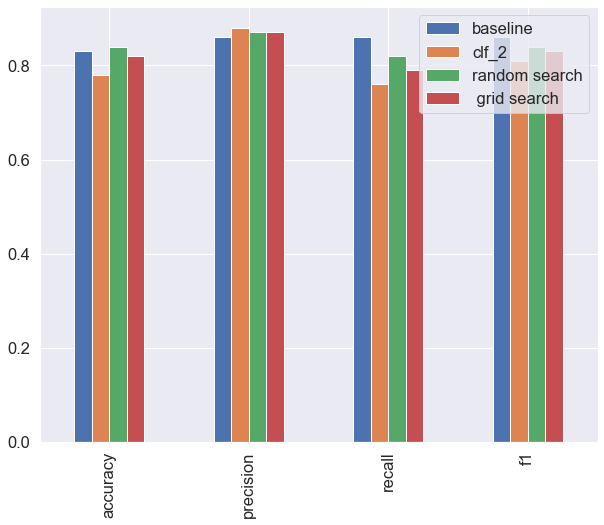

In [155]:
compare_metrices = pd.DataFrame({'baseline' : baseline_metrics,
                                 'clf_2' : clf_2_metrics,
                                 'random search' : rs_metrics,
                                 ' grid search' : gs_metrics})

compare_metrices.plot.bar(figsize = (10, 8));

#Depending on the model evalution parameters, 
#we can choose which is most suitable for us

In [156]:
compare_metrices

,baseline,clf_2,random search,grid search
accuracy,0.83,0.78,0.84,0.82
precision,0.86,0.88,0.87,0.87
recall,0.86,0.76,0.82,0.79
f1,0.86,0.81,0.84,0.83


## 6. Saving and loading trained Machine Learning models

Two ways to save and load machine learning models:
* with python's `pickle` module
* with the `joblib` module

For large model it is better to use `joblib`, in most of the cases

### 6.1 Pickle

In [157]:
import pickle 

#save an existing model to file
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [158]:
# Load the saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 
                                       "rb"))


In [159]:
#Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)


Accuracy  81.97%
Precision  86.67%
Recall  78.79%
F1  82.54%


{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

In [160]:
gs_metrics

{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

### 6.2 Joblib

In [161]:
from joblib import dump, load

#Save the model to a file
dump(gs_clf, filename = 'gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [162]:
# Import the saved joblib model
loaded_joblib_model = load(filename = 'gs_random_forest_model_1.joblib')

In [163]:
#Make and evalute joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy  81.97%
Precision  86.67%
Recall  78.79%
F1  82.54%


{'accuracy': 0.82, 'precision': 0.87, 'recall': 0.79, 'f1': 0.83}

## 7. Putting it all together!

In [164]:
data = pd.read_csv('car-sales-extended-missing-data.csv')

In [165]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [166]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [167]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data numbers 
3. Build a model on the data

In [168]:
# Getting data ready
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv(r"C:\Users\Harshal Garg\desktop\Z2M DS and ML\scikit\car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers = [
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps = [("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis = 1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [169]:
#Use GridSearchCV with our regression Pipeline
pipe_grid = {
    'preprocessor__num__imputer__strategy' : ['mean', 'median'],
    'model__n_estimators' : [100, 1000],
    'model__max_depth' : [None, 5],
    'model__max_features' : ['auto'],
    'model__min_samples_split' : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose = 2)
gs_model.fit(X_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.8s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.7s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   4.8s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   4.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   4.4s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.0min finished


In [170]:
gs_model.score(X_test, y_test)

0.3339554263158365

## Where to next?

If you've made it this far, congratulations! You've covered a lot of ground in the Scikit-Learn library.

As you might've guessed, there's a lot more that hasn't been covered.

But for the time being, you should be equipped with some of the most useful features of the library to start trying to apply them to your own problems.

Somewhere you might like to look next is to apply what you've learned above to a Kaggle competition. Kaggle competitions are great places to practice your data science and machine learning skills and compare your results with others.

A great idea would be to try to combine the heart disease classification code, as well as the `Pipeline` code, to build a model for the [Titanic dataset](https://www.kaggle.com/c/titanic).

Otherwise, if you'd like to figure out what else the Scikit-Learn library is capable, [check out the documentation](https://scikit-learn.org/stable/user_guide.html).